# RSS Step Size
This notebook will explore how step size affects gradient descent

test

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
x = np.array([1,2,3,4])
y = np.array([2,3,4,5])

Partial derivate for RSS is of the form $H^T(y-\hat{y})$

In [ ]:
def get_partial(known_values, feature_matrix, weights):
    return np.dot(np.transpose(feature_matrix), known_values-np.dot(feature_matrix, weights))

In [ ]:
# returns polynomial model for inputs based on degree and weight vector
# initialized to 0
def gen_predicted(x, deg):
    df = pd.DataFrame(x, columns=['x'])
    for i in range(deg+1):
        df['h'+str(i)] = df['x']**i
    return df.drop(['x'], axis=1).as_matrix(), np.zeros(deg+1)

In [ ]:
a, weights = gen_predicted(x, 1)

to follow my notebook, weights will be [0, 1]

In [ ]:
weights[1] = 1.

## Gradient Descent

We will use an abitrary tolerance of 0.2.  The step size will be fixed and tested across a range of different values

In [ ]:
tolerance = 0.2
step = [0.01, 0.1, 0.25, 1]

In [70]:
def add_to_plot(weights, label='', start=1, end=4, color=''):
    x_plot = np.arange(start, end, 0.1)
    y_plot = 0
    for index,val in enumerate(weights):
        y_plot += val*x_plot**index
    plt.plot(x_plot,y_plot,color, label=label)
    if label != '':
        plt.legend()

For a single iteration

In [ ]:
add_to_plot([1,1], 'original') # desired function
for s in step:
    next_weight = weights + s*get_partial(y, a, weights)
    add_to_plot(next_weight, str(s))
plt.legend()
plt.show()

After 20 iterations

In [ ]:
add_to_plot([1,1], 'original') # desired function
for s in step:
    temp_weights = weights
    for i in range(20):
        temp_weights = temp_weights + s*get_partial(y, a, temp_weights)
    add_to_plot(temp_weights, str(s))
plt.show()

Clearly, we have a problem with convergence. It appears that if the learning rate is too high, gradient descent will diverge.  Plot the time till convergence based on a range of values to find the best learning rate.

In [ ]:
step = np.arange(0.0001, 0.07, 0.0001)
x_step = []
y_iteration = []
for s in step:
    temp_weights = weights
    for i in range(1000):
        partial = get_partial(y,a,temp_weights)
        temp_weights = temp_weights + s*partial
        if (np.linalg.norm(partial)<0.01):
            x_step.append(s)
            y_iteration.append(i)
            break
plt.plot(x_step, y_iteration)
plt.show()

In [ ]:
pd.Series(y_iteration, index=x_step).idxmin()

# Descent Algorithm

In [ ]:
def gradient_descent(y, weights, feature_matrix, step_size, tolerance):
    y_copy = y.copy()
    feature_matrix_copy = feature_matrix.copy()
    weights_copy = weights.copy()
    while True:
        partial = get_partial(feature_matrix=feature_matrix_copy, predicted_values=y_copy, weights=weights_copy)
        weights_copy = weights_copy + step_size*partial
        if np.linalg.norm(partial)<tolerance:
            break
    return weights_copy

In [ ]:
weights

In [ ]:
model = gradient_descent(y, weights, a, 0.05, 0.001)

In [ ]:
model

In [ ]:
add_to_plot([1,1], 'original')
add_to_plot(model, 'predicted')
plt.show()

# Polynomial regression
First we will test a known function

Wrapper for determining the optimal step size

In [155]:
def learn_optimal(weights, y, feature_matrix, start, end, inc, iterations):
    step = np.arange(start,end,inc)
    print('# of steps ', len(step))
    x_step = []
    y_iteration = []
    for s in step:
        temp_weights = weights
        for i in range(iterations):
            partial = get_partial(y,feature_matrix,temp_weights)
            temp_weights = temp_weights + s*partial
            if (np.linalg.norm(partial)<0.01):
                x_step.append(s)
                y_iteration.append(i)
                break
    if y_iteration:
        plt.plot(x_step, y_iteration)
        plt.show()
        print(pd.Series(y_iteration, index=x_step).idxmin())
    else:
        print('convergence not found')

In [132]:
y_squared = np.array([2, 5, 10, 17])

In [133]:
poly_feature, poly_weights = gen_predicted(x, 2)

# of steps  100


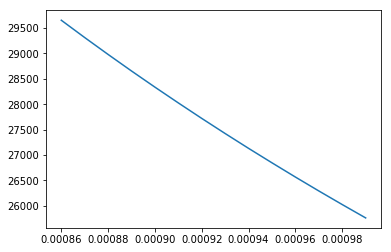

0.00099001


In [158]:
learn_optimal(poly_weights, y_squared, poly_feature, 0.00000001, 0.001, 0.00001, 30000)

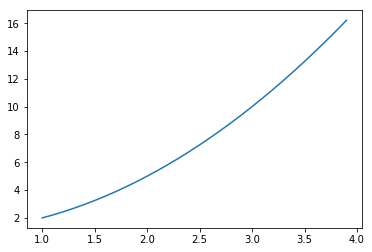

In [81]:
add_to_plot([1,0,1])
plt.show()

In [187]:
poly_model = gradient_descent(y_squared, poly_weights, poly_feature, 0.00096, 0.001)

In [188]:
poly_model

array([ 0.9896502 ,  0.00941585,  0.9982169 ])

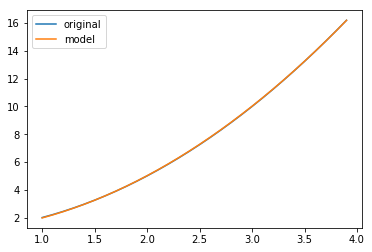

In [174]:
add_to_plot([1,0,1], 'original')
add_to_plot(poly_model, 'model')
plt.show()

## Unknown

In [175]:
y_unknown = y**2

# of steps  100


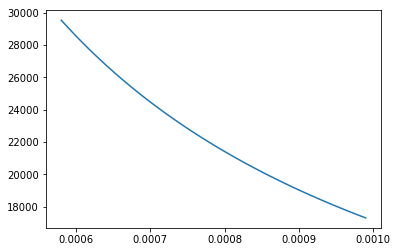

0.00099001


In [177]:
learn_optimal(poly_weights, y_unknown, poly_feature, 0.00000001, 0.001, 0.00001, 30000)

In [182]:
unknown_model = gradient_descent(y_unknown, poly_weights, poly_feature, 0.00096, 0.0001)

In [183]:
unknown_model

array([ 1.00103492,  1.99905847,  1.0001783 ])

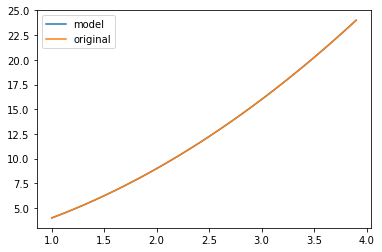

In [184]:
add_to_plot(unknown_model,'model')
add_to_plot([1,2,1],'original')
plt.show()

# Comparison


In [185]:
from sklearn import linear_model

In [194]:
reg = linear_model.LinearRegression()
reg.fit(poly_feature, y_squared)
reg.coef_

array([  0.00000000e+00,   6.00367074e-15,   1.00000000e+00])

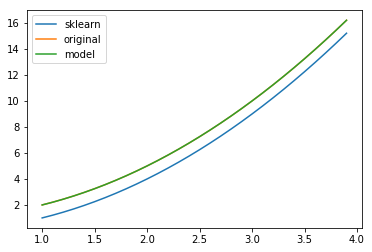

In [196]:
add_to_plot(reg.coef_,'sklearn')
add_to_plot([1,0,1],'original')
plt.show()